# 1. Import Libraries

In [120]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error , mean_squared_error

# 2. Load Dataset

In [121]:
data=pd.read_csv(r"c:\Users\24SRV\Downloads\Advertising (3).csv")
data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


# 3. Data Exploration

In [122]:
print(data.head())

   Unnamed: 0     TV  Radio  Newspaper  Sales
0           1  230.1   37.8       69.2   22.1
1           2   44.5   39.3       45.1   10.4
2           3   17.2   45.9       69.3    9.3
3           4  151.5   41.3       58.5   18.5
4           5  180.8   10.8       58.4   12.9


In [123]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB
None


In [124]:
print(data.describe())

       Unnamed: 0          TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000  200.000000
mean   100.500000  147.042500   23.264000   30.554000   14.022500
std     57.879185   85.854236   14.846809   21.778621    5.217457
min      1.000000    0.700000    0.000000    0.300000    1.600000
25%     50.750000   74.375000    9.975000   12.750000   10.375000
50%    100.500000  149.750000   22.900000   25.750000   12.900000
75%    150.250000  218.825000   36.525000   45.100000   17.400000
max    200.000000  296.400000   49.600000  114.000000   27.000000


In [125]:
print("Null values:\n",data.isna().sum())

Null values:
 Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64


In [126]:
print("Duplicated :" , data.duplicated().sum())

Duplicated : 0


# 4. Drop irrelevant columns

In [127]:
if "Unnamed: 0" in data.columns:
    data.drop(columns=["Unnamed: 0"], inplace=True)

In [128]:
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


# 5.Add new feature


In [129]:
data["Total"]=data["TV"]+data["Radio"]+data["Newspaper"]

In [130]:
data.head()

,TV,Radio,Newspaper,Sales,Total
0,230.1,37.8,69.2,22.1,337.1
1,44.5,39.3,45.1,10.4,128.9
2,17.2,45.9,69.3,9.3,132.4
3,151.5,41.3,58.5,18.5,251.3
4,180.8,10.8,58.4,12.9,250.0


# 6. Visualization

<Axes: xlabel='Total', ylabel='Sales'>

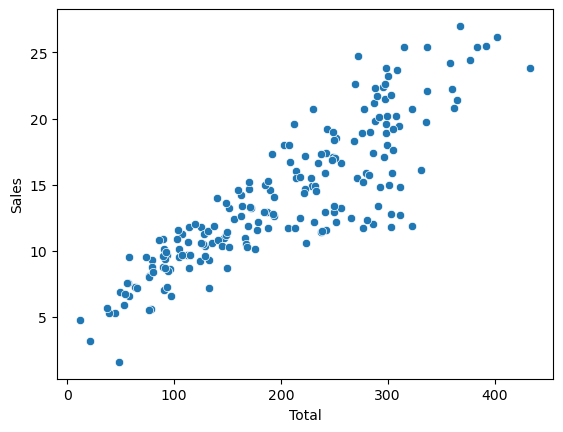

In [131]:
sns.scatterplot(x="Total" , y="Sales" , data=data)

<Axes: xlabel='Total', ylabel='Sales'>

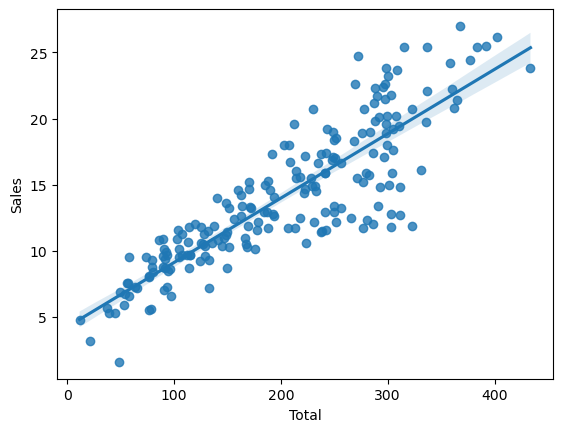

In [132]:
sns.regplot(x= 'Total',y='Sales',data=data)

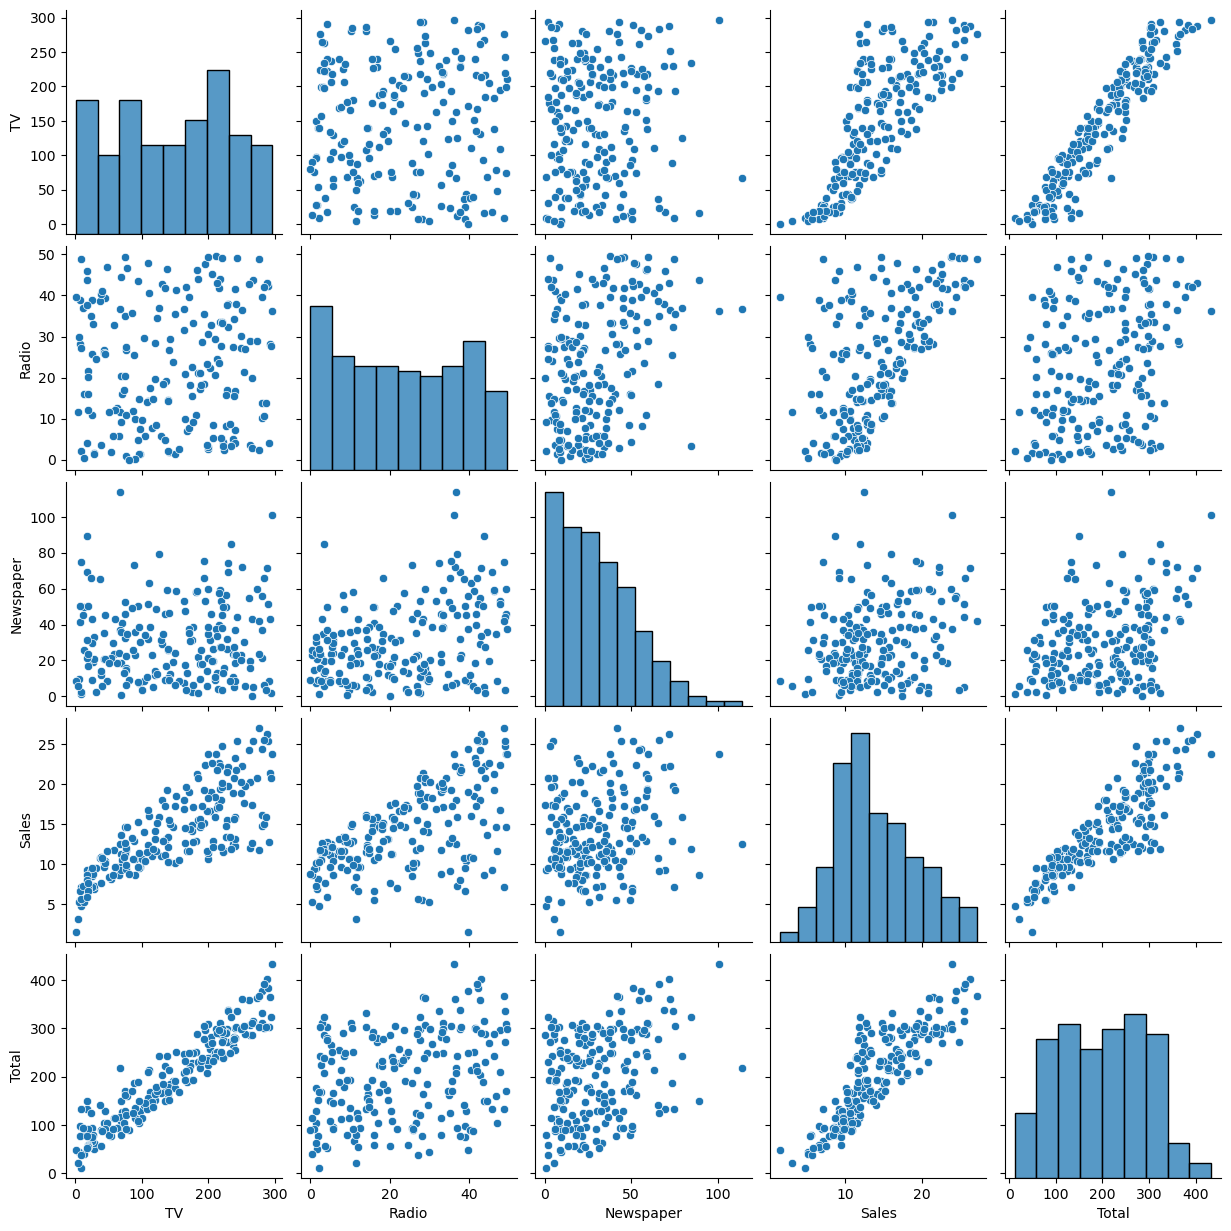

In [133]:
sns.pairplot(data)
plt.show()

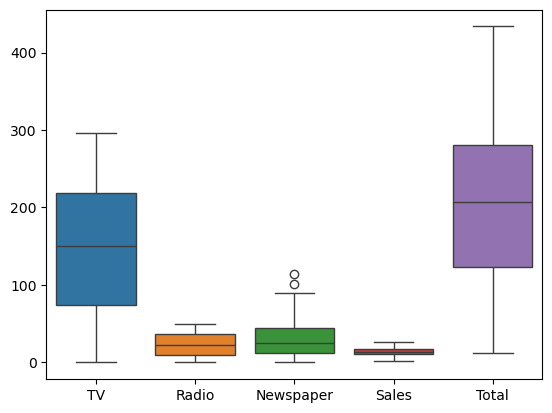

In [134]:
sns.boxplot(data)
plt.show()

# 7.Outlier Detection & Removal

In [135]:
column_outlier = []

for col in data.columns:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outliers = data[(data[col] < lower) | (data[col] > upper)]

    if not outliers.empty:
        column_outlier.append(col)

print("Columns with outliers:", column_outlier)


Columns with outliers: ['Newspaper']


<Axes: >

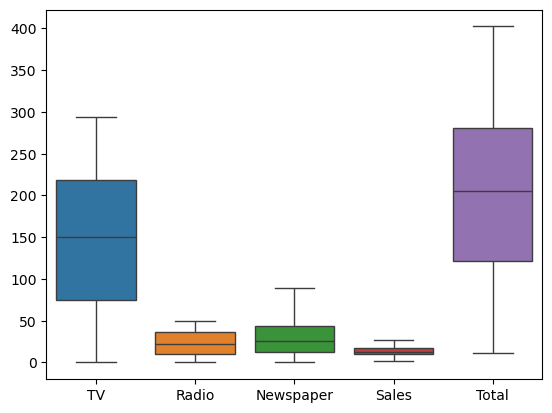

In [136]:
Q1 = data["Newspaper"].quantile(0.25)
Q3 = data["Newspaper"].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

mask = (data["Newspaper"] >= lower) & (data["Newspaper"] <= upper)
data=data[mask]
sns.boxplot(data)


# 8. Split Data

In [138]:
features = data.drop(columns=["Total", "Sales"])
target = data["Sales"]

In [139]:
X_train, X_test, y_train, y_test = train_test_split(
    features,target, test_size=0.2, random_state=42, shuffle=True
)


In [140]:
def checkShape(Xtrain,Xtest,Ytrain,Ytest):
    print("Xtrain shape is :", Xtrain.shape)
    print("Xtest shape is :", Xtest.shape)
    print("--"*30)
    print("Ytrain shape is :", Ytrain.shape)
    print("Ytest shape is :", Ytest.shape)

In [141]:
checkShape(X_train,X_test,y_train,y_test)

Xtrain shape is : (158, 3)
Xtest shape is : (40, 3)
------------------------------------------------------------
Ytrain shape is : (158,)
Ytest shape is : (40,)


# 9. Scaling

In [142]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 10. Model Training

In [143]:
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)


LinearRegression()

# 11. Prediction & Evaluation

In [148]:

y_pred = linear_model.predict(X_test_scaled)

print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))

Mean Absolute Error: 1.2497394075236383
Mean Squared Error: 2.740911906689994


# 12. Analysis

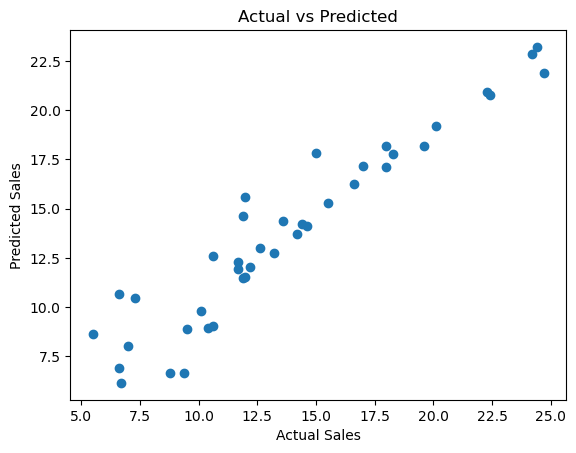

In [149]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted")
plt.show()

In [150]:
linear_model.predict([[-1.12377607e+00, -7.48673469e-01, -5.27603884e-01]])

array([7.56213752])